In [124]:
import math 
import pandas as pd 
import pandas_datareader as web 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import numpy as np
import seaborn as sns
import thinkplot
import statsmodels.api as sm


In [125]:
#Reads stats#
Shaq = pd.read_csv('/Users/Brett/Desktop/ShaqStats.csv')
LeBron= pd.read_csv('/Users/Brett/Desktop/LeBronStats.csv')
Kobe= pd.read_csv('/Users/Brett/Desktop/KobeStats.csv')
Dirk= pd.read_csv('/Users/Brett/Desktop/DirkStats.csv')
MJ= pd.read_csv('/Users/Brett/Desktop/MJStats.csv')
Karl= pd.read_csv('/Users/Brett/Desktop/KarlMalone.csv')


In [126]:
#Checks to see if data will be good to work with#
#Sees if there are na's which we will fix#
print(Shaq)
print(LeBron)
print(Kobe)
print(Dirk)
print(MJ)
print(Karl)


     Season  Age Team   Lg Pos   G  GS    MP    FG   FGA  ...    FT%  ORB  \
0   1992-93   20  ORL  NBA   C  81  81  37.9   9.0  16.1  ...  0.592  4.2   
1   1993-94   21  ORL  NBA   C  81  81  39.8  11.8  19.6  ...  0.554  4.7   
2   1994-95   22  ORL  NBA   C  79  79  37.0  11.8  20.2  ...  0.533  4.2   
3   1995-96   23  ORL  NBA   C  54  52  36.0  11.0  19.1  ...  0.487  3.4   
4   1996-97   24  LAL  NBA   C  51  51  38.1  10.8  19.4  ...  0.484  3.8   
5   1997-98   25  LAL  NBA   C  60  57  36.3  11.2  19.1  ...  0.527  3.5   
6   1998-99   26  LAL  NBA   C  49  49  34.8  10.4  18.1  ...  0.540  3.8   
7   1999-00   27  LAL  NBA   C  79  79  40.0  12.1  21.1  ...  0.524  4.3   
8   2000-01   28  LAL  NBA   C  74  74  39.5  11.0  19.2  ...  0.513  3.9   
9   2001-02   29  LAL  NBA   C  67  66  36.1  10.6  18.3  ...  0.555  3.5   
10  2002-03   30  LAL  NBA   C  67  66  37.8  10.4  18.1  ...  0.622  3.9   
11  2003-04   31  LAL  NBA   C  67  67  36.8   8.3  14.1  ...  0.490  3.7   

In [127]:
#Drops all NA's#
MJ=MJ.dropna()
Dirk=Dirk.dropna()
Kobe=Kobe.dropna()
Karl=Karl.dropna()
LeBron=LeBron.dropna()
Shaq=Shaq.dropna()

In [128]:
#Ensures all NA's have been dropped#
print(Shaq)
print(LeBron)
print(Kobe)
print(Dirk)
print(MJ)
print(Karl)

     Season  Age Team   Lg Pos   G  GS    MP    FG   FGA  ...    FT%  ORB  \
0   1992-93   20  ORL  NBA   C  81  81  37.9   9.0  16.1  ...  0.592  4.2   
1   1993-94   21  ORL  NBA   C  81  81  39.8  11.8  19.6  ...  0.554  4.7   
2   1994-95   22  ORL  NBA   C  79  79  37.0  11.8  20.2  ...  0.533  4.2   
3   1995-96   23  ORL  NBA   C  54  52  36.0  11.0  19.1  ...  0.487  3.4   
4   1996-97   24  LAL  NBA   C  51  51  38.1  10.8  19.4  ...  0.484  3.8   
6   1998-99   26  LAL  NBA   C  49  49  34.8  10.4  18.1  ...  0.540  3.8   
7   1999-00   27  LAL  NBA   C  79  79  40.0  12.1  21.1  ...  0.524  4.3   
8   2000-01   28  LAL  NBA   C  74  74  39.5  11.0  19.2  ...  0.513  3.9   
9   2001-02   29  LAL  NBA   C  67  66  36.1  10.6  18.3  ...  0.555  3.5   
16  2008-09   36  PHO  NBA   C  75  75  30.0   6.8  11.2  ...  0.595  2.5   
17  2009-10   37  CLE  NBA   C  53  53  23.4   4.9   8.7  ...  0.496  1.8   

    DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0   9.6  13.9  1.9  0.7  3.5

In [129]:
#Does a statistical analysis of player statistics# 
#Looks at all stats at once to breakdown further#
print("Shaq O'Neal Descriptive Stats")
Shaq.describe()

Shaq O'Neal Descriptive Stats


,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,26.636364,67.545455,67.272727,35.690909,10.018182,17.363636,0.577273,0.0,0.018182,0.045455,...,0.533909,3.645455,7.718182,11.345455,2.636364,0.672727,2.354545,2.718182,3.400000,25.136364
std,5.661673,13.170905,13.394707,4.968592,2.264870,3.919253,0.015311,0.0,0.040452,0.150756,...,0.038284,0.840671,1.465482,2.223225,0.760622,0.184883,0.733980,0.462208,0.268328,5.536113
min,20.000000,49.000000,49.000000,23.400000,4.900000,8.700000,0.557000,0.0,0.000000,0.000000,...,0.484000,1.800000,4.900000,6.700000,1.500000,0.300000,1.200000,2.000000,3.000000,12.000000
25%,22.500000,53.500000,52.500000,35.400000,9.700000,17.100000,0.569000,0.0,0.000000,0.000000,...,0.504500,3.450000,7.050000,10.700000,2.100000,0.600000,1.850000,2.550000,3.200000,24.800000
50%,26.000000,74.000000,74.000000,37.000000,10.800000,19.100000,0.574000,0.0,0.000000,0.000000,...,0.533000,3.800000,7.700000,11.400000,2.700000,0.700000,2.400000,2.700000,3.400000,26.600000
75%,28.500000,79.000000,79.000000,38.800000,11.400000,19.500000,0.581000,0.0,0.000000,0.000000,...,0.554500,4.200000,8.750000,12.950000,3.050000,0.800000,2.900000,2.900000,3.500000,29.000000
max,37.000000,81.000000,81.000000,40.000000,12.100000,21.100000,0.609000,0.0,0.100000,0.500000,...,0.595000,4.700000,9.600000,13.900000,3.800000,0.900000,3.500000,3.800000,4.000000,29.700000


In [130]:
print("LeBron James Descriptive Stats")
LeBron.describe()

LeBron James Descriptive Stats


,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,27.500000,72.777778,72.722222,37.994444,9.838889,19.505556,0.506000,1.538889,4.438889,0.344944,...,0.729667,1.161111,6.322222,7.461111,7.433333,1.561111,0.733333,3.516667,1.822222,26.933333
std,5.338539,9.867091,9.856652,2.535506,0.672256,1.462259,0.036856,0.401671,1.110452,0.027550,...,0.034181,0.299291,0.804075,0.828279,1.162148,0.268194,0.208637,0.339983,0.255655,2.281125
min,19.000000,45.000000,45.000000,33.400000,7.900000,17.600000,0.417000,0.800000,2.400000,0.290000,...,0.665000,0.600000,4.200000,5.500000,5.900000,1.100000,0.300000,3.000000,1.400000,20.900000
25%,23.250000,70.250000,70.250000,36.300000,9.625000,18.525000,0.485000,1.325000,3.750000,0.330750,...,0.701000,1.000000,6.000000,7.075000,6.650000,1.400000,0.600000,3.300000,1.625000,25.575000
50%,27.500000,76.000000,76.000000,37.750000,9.900000,19.100000,0.506500,1.550000,4.650000,0.346000,...,0.734500,1.150000,6.350000,7.550000,7.200000,1.600000,0.700000,3.450000,1.800000,27.100000
75%,31.750000,79.000000,79.000000,39.375000,10.100000,20.050000,0.528250,1.700000,4.975000,0.362750,...,0.753750,1.300000,6.875000,7.900000,8.175000,1.675000,0.875000,3.675000,1.975000,27.475000
max,36.000000,82.000000,82.000000,42.500000,11.100000,23.100000,0.567000,2.300000,6.300000,0.406000,...,0.780000,1.800000,7.500000,8.600000,10.200000,2.200000,1.100000,4.200000,2.300000,31.400000


In [131]:
print("Kobe Bryant Descriptive Stats")
Kobe.describe()

Kobe Bryant Descriptive Stats


,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,27.50000,67.30000,59.900000,35.770000,8.450000,19.040000,0.441400,1.300000,4.060000,0.317700,...,0.834950,1.065000,4.120000,5.200000,4.760000,1.410000,0.460000,3.130000,2.44000,24.200000
std,5.91608,18.88497,26.867903,6.484402,2.329558,4.802894,0.030605,0.560075,1.587252,0.045534,...,0.018908,0.342245,1.000316,1.160762,1.277909,0.350789,0.250053,0.864566,0.56884,6.611632
min,18.00000,6.00000,1.000000,15.500000,2.500000,5.900000,0.358000,0.400000,1.700000,0.188000,...,0.794000,0.300000,1.200000,1.900000,1.300000,0.700000,0.100000,1.600000,1.40000,7.600000
25%,22.75000,65.75000,56.000000,34.350000,7.500000,17.650000,0.429500,0.850000,2.775000,0.300500,...,0.820500,0.875000,4.075000,5.175000,4.575000,1.200000,0.300000,2.750000,2.05000,21.700000
50%,27.50000,72.00000,67.000000,38.250000,9.200000,20.250000,0.451000,1.400000,4.100000,0.325500,...,0.839000,1.100000,4.300000,5.450000,5.000000,1.400000,0.400000,3.100000,2.60000,26.050000
75%,32.25000,80.00000,80.000000,39.350000,9.825000,21.675000,0.463250,1.725000,5.200000,0.344750,...,0.850500,1.325000,4.700000,5.750000,5.525000,1.625000,0.525000,3.500000,2.82500,28.000000
max,37.00000,82.00000,82.000000,41.500000,12.200000,27.200000,0.469000,2.300000,7.100000,0.383000,...,0.868000,1.600000,5.600000,6.900000,6.300000,2.200000,1.000000,5.700000,3.30000,35.400000


In [132]:
print("Dirk Nowitzki Descriptive Stats")
Dirk.describe()

Dirk Nowitzki Descriptive Stats


,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.00000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,30.000000,72.476190,69.523810,33.009524,7.133333,15.219048,0.463000,1.290476,3.40000,0.374714,...,0.870714,0.933333,6.423810,7.347619,2.338095,0.785714,0.819048,1.604762,2.338095,20.109524
std,6.204837,11.435117,18.249984,6.448093,1.935803,3.598836,0.033393,0.424152,1.05119,0.046825,...,0.037940,0.427005,1.613972,1.930186,0.724897,0.278003,0.297690,0.502470,0.424825,5.722054
min,20.000000,47.000000,20.000000,15.600000,2.600000,7.100000,0.359000,0.300000,1.40000,0.206000,...,0.773000,0.100000,2.600000,3.100000,0.700000,0.200000,0.400000,0.400000,1.500000,7.300000
25%,25.000000,73.000000,73.000000,31.300000,6.300000,13.700000,0.457000,1.000000,2.90000,0.368000,...,0.860000,0.700000,5.700000,6.500000,1.900000,0.600000,0.600000,1.300000,2.100000,17.300000
50%,30.000000,77.000000,77.000000,35.800000,7.900000,16.200000,0.463000,1.300000,3.60000,0.380000,...,0.881000,1.000000,6.300000,7.000000,2.500000,0.700000,0.800000,1.800000,2.200000,21.800000
75%,35.000000,80.000000,80.000000,37.900000,8.500000,17.200000,0.479000,1.600000,4.10000,0.399000,...,0.896000,1.200000,7.500000,8.900000,2.700000,0.900000,1.000000,1.900000,2.600000,24.600000
max,40.000000,82.000000,82.000000,39.000000,9.600000,20.000000,0.517000,1.900000,4.90000,0.421000,...,0.915000,1.600000,8.900000,9.900000,3.500000,1.400000,1.500000,2.300000,3.100000,26.600000


In [133]:
print("Michael Jordan Descriptive Stats")
MJ.describe()

Michael Jordan Descriptive Stats


,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,...,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,28.800000,71.466667,69.266667,37.580000,11.093333,22.700000,0.488267,0.540000,1.62000,0.283933,...,0.830933,1.513333,4.593333,6.12000,5.140000,2.293333,0.833333,2.686667,2.593333,29.453333
std,5.595917,22.617524,24.647418,3.739977,1.643371,2.497141,0.042286,0.479285,1.03868,0.106920,...,0.022429,0.366190,0.949035,0.98067,1.284412,0.577515,0.363842,0.509715,0.503511,4.763832
min,21.000000,17.000000,7.000000,25.100000,8.300000,18.200000,0.411000,0.100000,0.60000,0.132000,...,0.784000,0.800000,2.300000,3.60000,2.900000,1.400000,0.400000,2.000000,1.800000,20.000000
25%,24.500000,79.000000,72.500000,37.350000,10.000000,22.150000,0.461000,0.200000,0.85000,0.185500,...,0.826500,1.350000,4.350000,5.75000,4.300000,1.750000,0.500000,2.350000,2.250000,27.550000
50%,28.000000,82.000000,82.000000,38.800000,11.200000,22.700000,0.495000,0.300000,1.20000,0.276000,...,0.837000,1.600000,4.800000,6.10000,5.300000,2.300000,0.800000,2.500000,2.600000,30.100000
75%,32.500000,82.000000,82.000000,39.300000,12.350000,23.900000,0.522500,0.950000,2.40000,0.363000,...,0.846500,1.750000,5.150000,6.65000,5.900000,2.800000,0.950000,3.050000,2.900000,32.550000
max,39.000000,82.000000,82.000000,40.400000,13.400000,27.800000,0.539000,1.400000,3.60000,0.500000,...,0.857000,2.000000,6.200000,8.00000,8.000000,3.200000,1.600000,3.600000,3.500000,37.100000


In [134]:
print("Karl Malone Descriptive Stats")
Karl.describe()

Karl Malone Descriptive Stats


,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.00000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,31.000000,77.684211,77.421053,37.052632,9.010526,17.505263,0.512895,0.042105,0.205263,0.201158,...,0.734474,2.389474,7.70000,10.089474,3.584211,1.410526,0.763158,3.057895,3.089474,24.689474
std,5.627314,11.421484,11.398420,2.427474,1.633638,2.627943,0.028639,0.069248,0.164903,0.153371,...,0.077112,0.639353,0.76956,1.242263,0.783343,0.249209,0.256495,0.410035,0.395664,4.616624
min,22.000000,42.000000,42.000000,30.600000,4.600000,9.500000,0.454000,0.000000,0.000000,0.000000,...,0.481000,1.400000,6.40000,7.800000,1.900000,1.000000,0.400000,2.400000,2.500000,13.200000
25%,26.500000,81.000000,80.500000,36.050000,8.150000,16.950000,0.496500,0.000000,0.100000,0.000000,...,0.731500,2.000000,7.15000,9.150000,2.950000,1.250000,0.600000,2.850000,2.800000,22.800000
50%,31.000000,82.000000,82.000000,37.700000,9.600000,18.200000,0.519000,0.000000,0.200000,0.250000,...,0.761000,2.300000,7.50000,10.300000,3.800000,1.400000,0.700000,3.000000,3.000000,25.700000
75%,35.500000,82.000000,82.000000,38.100000,10.100000,19.050000,0.528500,0.100000,0.250000,0.323000,...,0.774000,2.850000,8.40000,11.150000,4.150000,1.550000,0.900000,3.300000,3.300000,27.550000
max,40.000000,82.000000,82.000000,40.600000,11.100000,20.100000,0.562000,0.200000,0.500000,0.400000,...,0.797000,3.400000,8.90000,12.000000,4.700000,1.900000,1.500000,4.000000,3.900000,31.000000


In [135]:
#Taking a deeper look at Offensive Stats, looking at PTS, ORB, FG, FT%#
#Points Per Game Comparison Average#
print('Shaq ONeal Career Average Points:',Shaq['PTS'].mean())
print('LeBron James Career Average Points:',LeBron['PTS'].mean())
print('Kobe Bryant Career Average Points:',Kobe['PTS'].mean())
print('Dirk Nowitzki Career Average Points:',Dirk['PTS'].mean())
print('Michael Jordan Career Average Points:',MJ['PTS'].mean())
print('Karl Malone Career Average Points:',Karl['PTS'].mean())


Shaq ONeal Career Average Points: 25.13636363636363
LeBron James Career Average Points: 26.933333333333334
Kobe Bryant Career Average Points: 24.200000000000006
Dirk Nowitzki Career Average Points: 20.109523809523814
Michael Jordan Career Average Points: 29.45333333333333
Karl Malone Career Average Points: 24.689473684210526


Text(0.5, 1.0, 'NBA Legends PPG Comparison')

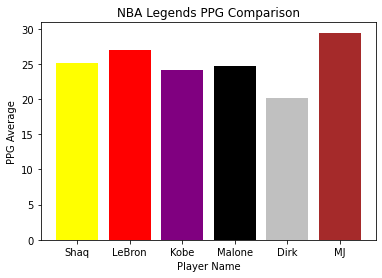

In [136]:
#Players PPG Comparison Chart#
ShaqPPG= Shaq['PTS'].mean()
LeBronPPG=LeBron['PTS'].mean()
KobePPG=Kobe['PTS'].mean()
DirkPPG=Dirk['PTS'].mean()
MJPPG=MJ['PTS'].mean()
KarlPPG=Karl['PTS'].mean()
plt.bar('Shaq',ShaqPPG, color= 'yellow', label='Shaq')
plt.bar('LeBron',LeBronPPG, color= 'red', label='LeBron')
plt.bar('Kobe',KobePPG, color= 'purple', label='Kobe')
plt.bar('Malone',KarlPPG, color= 'black', label='Malone')
plt.bar('Dirk',DirkPPG, color= 'silver', label='Dirk')
plt.bar('MJ',MJPPG, color= 'brown', label='MJ')
plt.xlabel('Player Name')
plt.ylabel('PPG Average')
plt.title('NBA Legends PPG Comparison')


In [137]:
#Offensive Rebounds Per Game Comparison Average#
print('Shaq ONeal Career Average Offensive Rebounds:',Shaq['ORB'].mean())
print('LeBron James Career Average Offensive Rebounds:',LeBron['ORB'].mean())
print('Kobe Bryant Career Average Offensive Rebounds:',Kobe['ORB'].mean())
print('Dirk Nowitzki Career Average Offensive Rebounds:',Dirk['ORB'].mean())
print('Michael Jordan Career Average Offensive Rebounds:',MJ['ORB'].mean())
print('Karl Malone Career Average Offensive Rebounds:',Karl['ORB'].mean())


Shaq ONeal Career Average Offensive Rebounds: 3.6454545454545455
LeBron James Career Average Offensive Rebounds: 1.161111111111111
Kobe Bryant Career Average Offensive Rebounds: 1.0650000000000002
Dirk Nowitzki Career Average Offensive Rebounds: 0.9333333333333332
Michael Jordan Career Average Offensive Rebounds: 1.5133333333333332
Karl Malone Career Average Offensive Rebounds: 2.389473684210526


Text(0.5, 1.0, 'NBA Legends ORB Comparison')

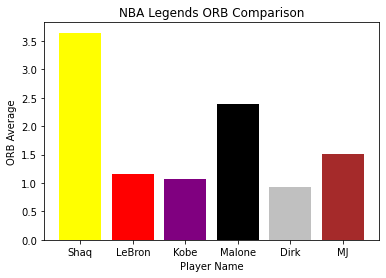

In [138]:
#Players ORB Comparison Chart#
ShaqORB= Shaq['ORB'].mean()
LeBronORB=LeBron['ORB'].mean()
KobeORB=Kobe['ORB'].mean()
DirkORB=Dirk['ORB'].mean()
MJORB=MJ['ORB'].mean()
KarlORB=Karl['ORB'].mean()
plt.bar('Shaq',ShaqORB, color= 'yellow', label='Shaq')
plt.bar('LeBron',LeBronORB, color= 'red', label='LeBron')
plt.bar('Kobe',KobeORB, color= 'purple', label='Kobe')
plt.bar('Malone',KarlORB, color= 'black', label='Malone')
plt.bar('Dirk',DirkORB, color= 'silver', label='Dirk')
plt.bar('MJ',MJORB, color= 'brown', label='MJ')
plt.xlabel('Player Name')
plt.ylabel('ORB Average')
plt.title('NBA Legends ORB Comparison')


In [139]:
#Field Goals Made Per Game Comparison Average#
print('Shaq ONeal Career Average Field Goals Made:',Shaq['FG'].mean())
print('LeBron James Career Average Field Goals Made:',LeBron['FG'].mean())
print('Kobe Bryant Career Average Field Goals Made:',Kobe['FG'].mean())
print('Dirk Nowitzki Career Average Field Goals Made:',Dirk['FG'].mean())
print('Michael Jordan Career Average Field Goals Made:',MJ['FG'].mean())
print('Karl Malone Career Average Field Goals Made:',Karl['FG'].mean())


Shaq ONeal Career Average Field Goals Made: 10.018181818181818
LeBron James Career Average Field Goals Made: 9.838888888888887
Kobe Bryant Career Average Field Goals Made: 8.45
Dirk Nowitzki Career Average Field Goals Made: 7.133333333333333
Michael Jordan Career Average Field Goals Made: 11.093333333333332
Karl Malone Career Average Field Goals Made: 9.010526315789475


Text(0.5, 1.0, 'NBA Legends FG Comparison')

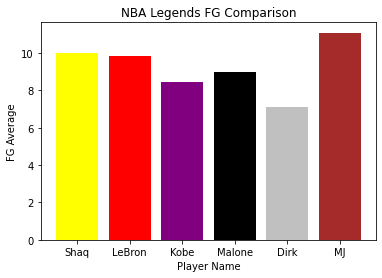

In [140]:
#Players FG Comparison Chart#
ShaqFG= Shaq['FG'].mean()
LeBronFG=LeBron['FG'].mean()
KobeFG=Kobe['FG'].mean()
DirkFG=Dirk['FG'].mean()
MJFG=MJ['FG'].mean()
KarlFG=Karl['FG'].mean()
plt.bar('Shaq',ShaqFG, color= 'yellow', label='Shaq')
plt.bar('LeBron',LeBronFG, color= 'red', label='LeBron')
plt.bar('Kobe',KobeFG, color= 'purple', label='Kobe')
plt.bar('Malone',KarlFG, color= 'black', label='Malone')
plt.bar('Dirk',DirkFG, color= 'silver', label='Dirk')
plt.bar('MJ',MJFG, color= 'brown', label='MJ')
plt.xlabel('Player Name')
plt.ylabel('FG Average')
plt.title('NBA Legends FG Comparison')


In [141]:
#Free Throw Percentage Made Per Game Comparison Average#
print('Shaq ONeal Career Average Free Throw Percentage Made:',Shaq['FT%'].mean())
print('LeBron James Career Average Free Throw Percentage Made:',LeBron['FT%'].mean())
print('Kobe Bryant Career Average Free Throw Percentage Made:',Kobe['FT%'].mean())
print('Dirk Nowitzki Career Average Free Throw Percentage Made:',Dirk['FT%'].mean())
print('Michael Jordan Career Average Free Throw Percentage Made:',MJ['FT%'].mean())
print('Karl Malone Career Average Free Throw Percentage Made:',Karl['FT%'].mean())


Shaq ONeal Career Average Free Throw Percentage Made: 0.5339090909090909
LeBron James Career Average Free Throw Percentage Made: 0.7296666666666666
Kobe Bryant Career Average Free Throw Percentage Made: 0.8349499999999999
Dirk Nowitzki Career Average Free Throw Percentage Made: 0.8707142857142858
Michael Jordan Career Average Free Throw Percentage Made: 0.8309333333333334
Karl Malone Career Average Free Throw Percentage Made: 0.7344736842105263


Text(0.5, 1.0, 'NBA Legends FT Comparison')

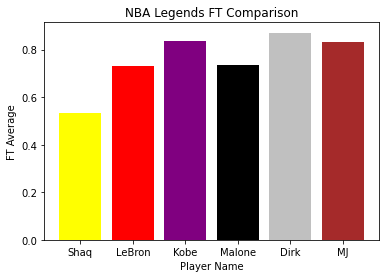

In [189]:
#Players PPG Comparison Chart#
ShaqFT= Shaq['FT%'].mean()
LeBronFT=LeBron['FT%'].mean()
KobeFT=Kobe['FT%'].mean()
DirkFT=Dirk['FT%'].mean()
MJFT=MJ['FT%'].mean()
KarlFT=Karl['FT%'].mean()
plt.bar('Shaq',ShaqFT, color= 'yellow', label='Shaq')
plt.bar('LeBron',LeBronFT, color= 'red', label='LeBron')
plt.bar('Kobe',KobeFT, color= 'purple', label='Kobe')
plt.bar('Malone',KarlFT, color= 'black', label='Malone')
plt.bar('Dirk',DirkFT, color= 'silver', label='Dirk')
plt.bar('MJ',MJFT, color= 'brown', label='MJ')
plt.xlabel('Player Name')
plt.ylabel('FT Average')
plt.title('NBA Legends FT Comparison')


In [143]:
#Creates Regression Data for Age vs PPG#
#Below will show this for each basketball legend#
X1 = Shaq.Age
X1 = sm.add_constant(X1)

Y1 = Shaq.PTS
mod3 = sm.OLS(Y1,X1)
res3 = mod3.fit()
print('Shaq ONeal Regression')

print(res3.summary())


Shaq ONeal Regression
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     11.24
Date:                Sun, 27 Jun 2021   Prob (F-statistic):            0.00850
Time:                        10:36:07   Log-Likelihood:                -29.452
No. Observations:                  11   AIC:                             62.90
Df Residuals:                       9   BIC:                             63.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.5440      5.9

/Users/Brett/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0.5, 1.0, 'Shaq ONeal Age vs PTS')

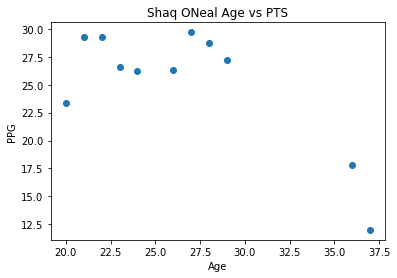

In [144]:
plt.scatter(x=Shaq['Age'], y=Shaq['PTS'])
plt.xlabel('Age')
plt.ylabel('PPG')
plt.title('Shaq ONeal Age vs PTS')

Text(0.5, 1.0, 'Shaq Points Plot')

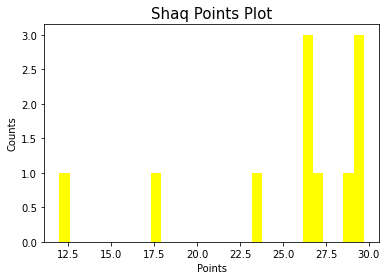

In [145]:
plt.hist(Shaq['PTS'], bins = 30, color='yellow')
plt.xlabel('Points', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Shaq Points Plot',fontsize=15)

Text(0.5, 1.0, 'Shaq Offensive Rebounds Plot')

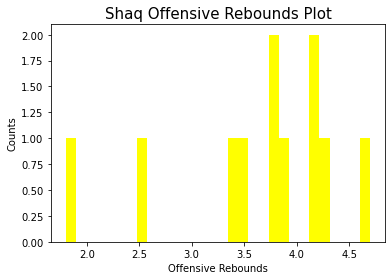

In [146]:
plt.hist(Shaq['ORB'], bins = 30, color='yellow')
plt.xlabel('Offensive Rebounds', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Shaq Offensive Rebounds Plot',fontsize=15)

Text(0.5, 1.0, 'Shaq Free Throws Plot')

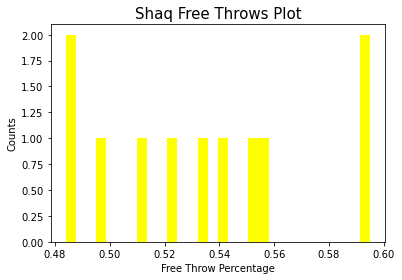

In [147]:
plt.hist(Shaq['FT%'], bins = 30, color='yellow')
plt.xlabel('Free Throw Percentage', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Shaq Free Throws Plot',fontsize=15)

Text(0.5, 1.0, 'Shaq Field Goals Plot')

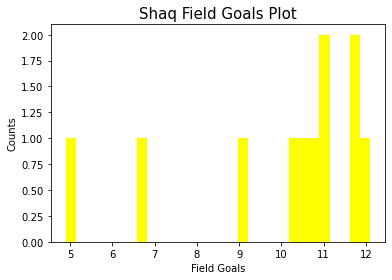

In [148]:
plt.hist(Shaq['FG'], bins = 30, color='yellow')
plt.xlabel('Field Goals', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Shaq Field Goals Plot',fontsize=15)

In [149]:
X2 = LeBron.Age
X2 = sm.add_constant(X2)

Y2 = LeBron.PTS
mod3 = sm.OLS(Y2,X2)
res3 = mod3.fit()
print('LeBron James Regression')

print(res3.summary())

LeBron James Regression
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.6834
Date:                Sun, 27 Jun 2021   Prob (F-statistic):              0.421
Time:                        10:36:11   Log-Likelihood:                -39.494
No. Observations:                  18   AIC:                             82.99
Df Residuals:                      16   BIC:                             84.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.3116      2

/Users/Brett/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0.5, 1.0, 'LeBron James Age vs PTS')

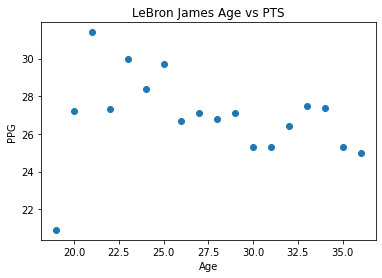

In [150]:
plt.scatter(x=LeBron['Age'], y=LeBron['PTS'])
plt.xlabel('Age')
plt.ylabel('PPG')
plt.title('LeBron James Age vs PTS')

Text(0.5, 1.0, 'LeBron James Points Plot')

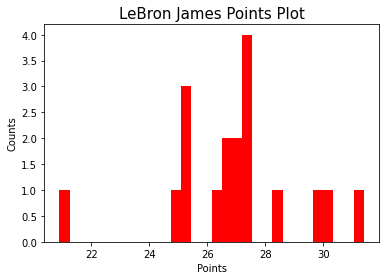

In [151]:
plt.hist(LeBron['PTS'], bins = 30, color='red')
plt.xlabel('Points', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('LeBron James Points Plot',fontsize=15)

Text(0.5, 1.0, 'LeBron James Offensive Rebounds Plot')

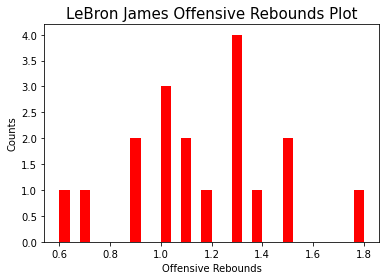

In [152]:
plt.hist(LeBron['ORB'], bins = 30, color='red')
plt.xlabel('Offensive Rebounds', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('LeBron James Offensive Rebounds Plot',fontsize=15)

Text(0.5, 1.0, 'LeBron James Free Throw Plot')

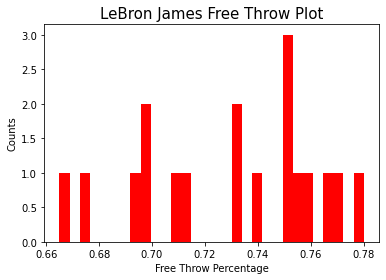

In [153]:
plt.hist(LeBron['FT%'], bins = 30, color='red')
plt.xlabel('Free Throw Percentage', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('LeBron James Free Throw Plot',fontsize=15)

Text(0.5, 1.0, 'LeBron James Field Goal Plot')

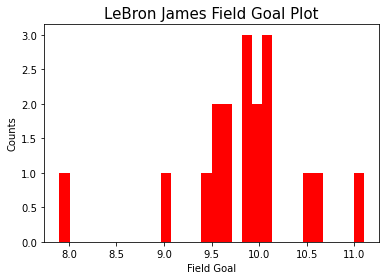

In [154]:
plt.hist(LeBron['FG'], bins = 30, color='red')
plt.xlabel('Field Goal', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('LeBron James Field Goal Plot',fontsize=15)

In [155]:
X3 = Karl.Age
X3 = sm.add_constant(X3)

Y3 = Karl.PTS
mod3 = sm.OLS(Y3,X3)
res3 = mod3.fit()
print('Karl Malone Regression')

print(res3.summary())

Karl Malone Regression
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.853
Date:                Sun, 27 Jun 2021   Prob (F-statistic):              0.191
Time:                        10:36:15   Log-Likelihood:                -54.527
No. Observations:                  19   AIC:                             113.1
Df Residuals:                      17   BIC:                             114.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.6625      5.

/Users/Brett/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0.5, 1.0, 'Karl Malone Age vs PTS')

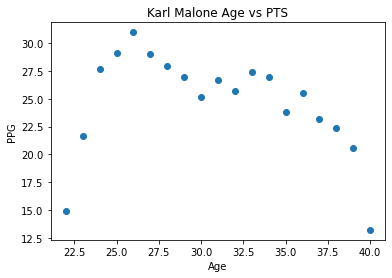

In [156]:
plt.scatter(x=Karl['Age'], y=Karl['PTS'])
plt.xlabel('Age')
plt.ylabel('PPG')
plt.title('Karl Malone Age vs PTS')

Text(0.5, 1.0, 'Karl Malone Points Plot')

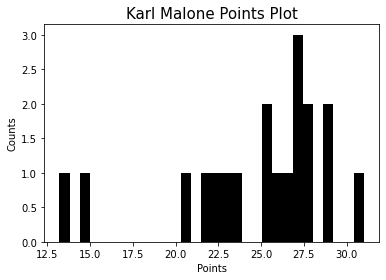

In [167]:
plt.hist(Karl['PTS'], bins = 30, color='black')
plt.xlabel('Points', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Karl Malone Points Plot',fontsize=15)

Text(0.5, 1.0, 'Karl Malone Offensive Rebounds Plot')

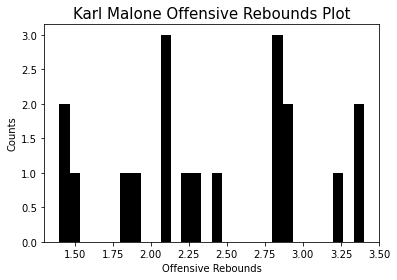

In [168]:
plt.hist(Karl['ORB'], bins = 30, color='black')
plt.xlabel('Offensive Rebounds', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Karl Malone Offensive Rebounds Plot',fontsize=15)

Text(0.5, 1.0, 'Karl Malone Free Throws Plot')

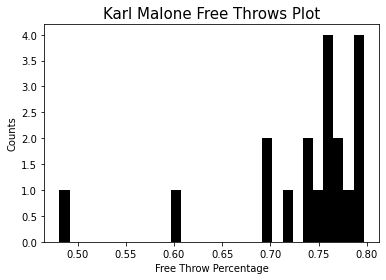

In [169]:
plt.hist(Karl['FT%'], bins = 30, color='black')
plt.xlabel('Free Throw Percentage', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Karl Malone Free Throws Plot',fontsize=15)

Text(0.5, 1.0, 'Karl Malone Field Goals Plot')

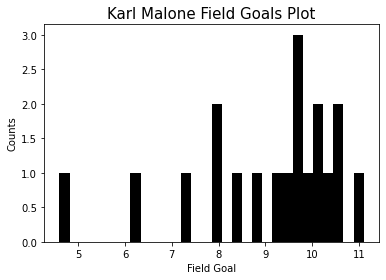

In [170]:
plt.hist(Karl['FG'], bins = 30, color='black')
plt.xlabel('Field Goal', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Karl Malone Field Goals Plot',fontsize=15)

In [171]:
X4 = Kobe.Age
X4 = sm.add_constant(X4)

Y4 = Kobe.PTS
mod3 = sm.OLS(Y4,X4)
res3 = mod3.fit()
print('Kobe Bryant Regression')

print(res3.summary())

Kobe Bryant Regression
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.5854
Date:                Sun, 27 Jun 2021   Prob (F-statistic):              0.454
Time:                        12:46:41   Log-Likelihood:                -65.322
No. Observations:                  20   AIC:                             134.6
Df Residuals:                      18   BIC:                             136.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7455      7.

Text(0.5, 1.0, 'Kobe Bryant Age vs PTS')

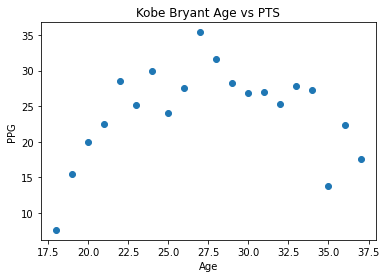

In [172]:
plt.scatter(x=Kobe['Age'], y=Kobe['PTS'])
plt.xlabel('Age')
plt.ylabel('PPG')
plt.title('Kobe Bryant Age vs PTS')

Text(0.5, 1.0, 'Kobe Bryant Points Plot')

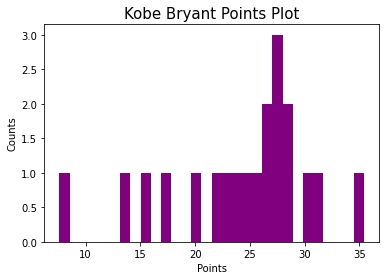

In [173]:
plt.hist(Kobe['PTS'], bins = 30, color='purple')
plt.xlabel('Points', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Kobe Bryant Points Plot',fontsize=15)

Text(0.5, 1.0, 'Kobe Bryant Points Plot')

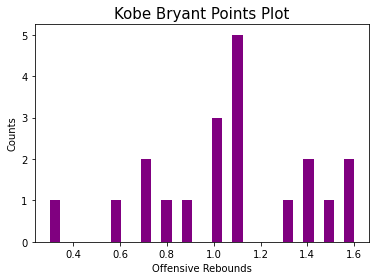

In [174]:
plt.hist(Kobe['ORB'], bins = 30, color='purple')
plt.xlabel('Offensive Rebounds', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Kobe Bryant Points Plot',fontsize=15)

Text(0.5, 1.0, 'Kobe Bryant Points Plot')

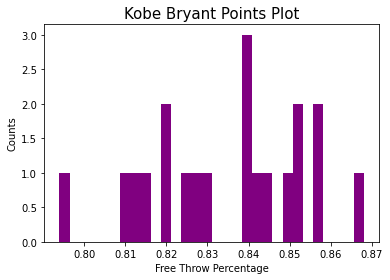

In [175]:
plt.hist(Kobe['FT%'], bins = 30, color='purple')
plt.xlabel('Free Throw Percentage', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Kobe Bryant Points Plot',fontsize=15)

Text(0.5, 1.0, 'Kobe Bryant Points Plot')

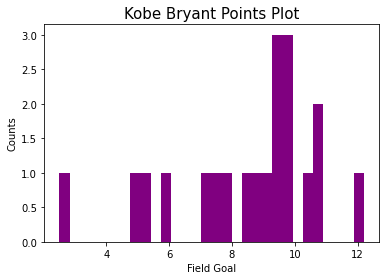

In [176]:
plt.hist(Kobe['FG'], bins = 30, color='purple')
plt.xlabel('Field Goal', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Kobe Bryant Points Plot',fontsize=15)

In [177]:
X5 = Dirk.Age
X5 = sm.add_constant(X5)

Y5 = Dirk.PTS
mod3 = sm.OLS(Y5,X5)
res3 = mod3.fit()
print('Dirk Nowitzki Regression')

print(res3.summary())

Dirk Nowitzki Regression
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     2.795
Date:                Sun, 27 Jun 2021   Prob (F-statistic):              0.111
Time:                        12:46:44   Log-Likelihood:                -64.475
No. Observations:                  21   AIC:                             133.0
Df Residuals:                      19   BIC:                             135.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0173      

Text(0.5, 1.0, 'Dirk Nowitzki Age vs PTS')

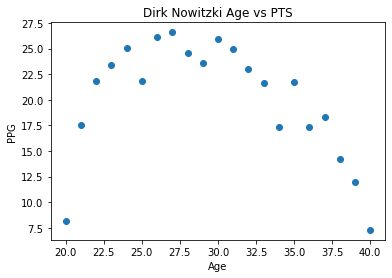

In [178]:
plt.scatter(x=Dirk['Age'], y=Dirk['PTS'])
plt.xlabel('Age')
plt.ylabel('PPG')
plt.title('Dirk Nowitzki Age vs PTS')

Text(0.5, 1.0, 'Dirk Nowitzki Points Plot')

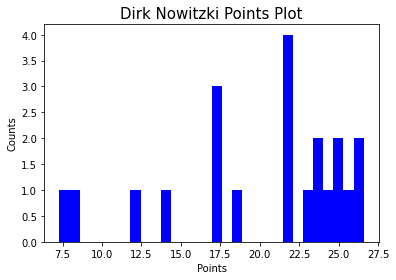

In [179]:
plt.hist(Dirk['PTS'], bins = 30, color='blue')
plt.xlabel('Points', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Dirk Nowitzki Points Plot',fontsize=15)

Text(0.5, 1.0, 'Dirk Nowitzki Points Plot')

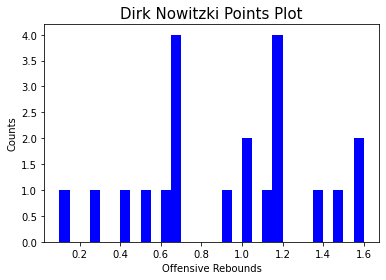

In [180]:
plt.hist(Dirk['ORB'], bins = 30, color='blue')
plt.xlabel('Offensive Rebounds', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Dirk Nowitzki Points Plot',fontsize=15)

Text(0.5, 1.0, 'Dirk Nowitzki Points Plot')

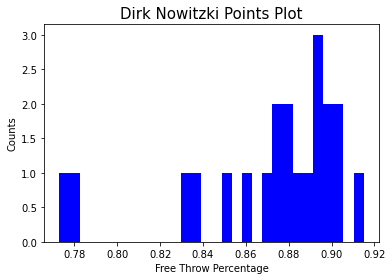

In [181]:
plt.hist(Dirk['FT%'], bins = 30, color='blue')
plt.xlabel('Free Throw Percentage', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Dirk Nowitzki Points Plot',fontsize=15)

Text(0.5, 1.0, 'Dirk Nowitzki Points Plot')

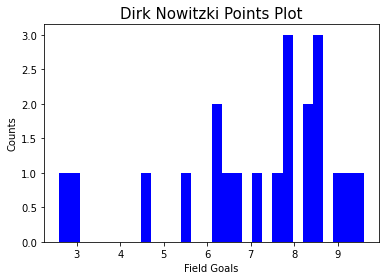

In [182]:
plt.hist(Dirk['FG'], bins = 30, color='blue')
plt.xlabel('Field Goals', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('Dirk Nowitzki Points Plot',fontsize=15)

In [183]:
X6 = MJ.Age
X6 = sm.add_constant(X6)

Y6 = MJ.PTS
mod3 = sm.OLS(Y6,X6)
res3 = mod3.fit()
print('Michael Jordan Regression')

print(res3.summary())

Michael Jordan Regression
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     5.589
Date:                Sun, 27 Jun 2021   Prob (F-statistic):             0.0343
Time:                        12:46:47   Log-Likelihood:                -41.500
No. Observations:                  15   AIC:                             87.00
Df Residuals:                      13   BIC:                             88.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8968     

/Users/Brett/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0.5, 1.0, 'Michael Jordan Age vs PTS')

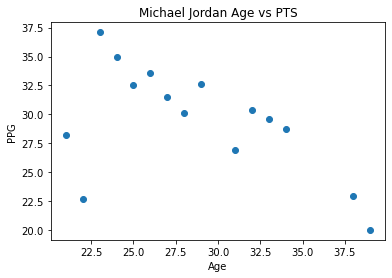

In [184]:
plt.scatter(x=MJ['Age'], y=MJ['PTS'])
plt.xlabel('Age')
plt.ylabel('PPG')
plt.title('Michael Jordan Age vs PTS')


Text(0.5, 1.0, 'MJ Points Plot')

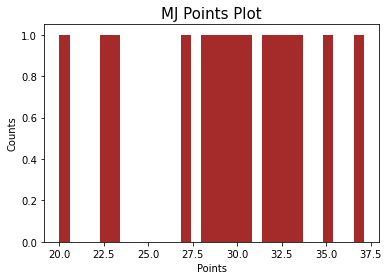

In [185]:
plt.hist(MJ['PTS'], bins = 30, color='brown')
plt.xlabel('Points', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('MJ Points Plot',fontsize=15)

Text(0.5, 1.0, 'MJ Offensive Rebounds Plot')

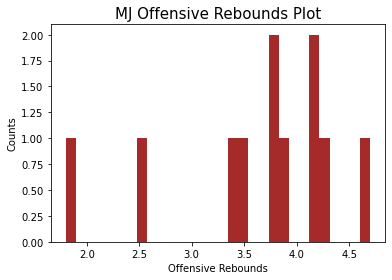

In [186]:
plt.hist(Shaq['ORB'], bins = 30, color='brown')
plt.xlabel('Offensive Rebounds', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('MJ Offensive Rebounds Plot',fontsize=15)

Text(0.5, 1.0, 'MJ Free Throw Plot')

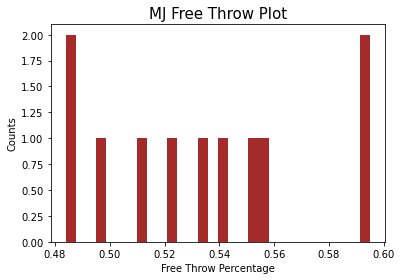

In [187]:
plt.hist(Shaq['FT%'], bins = 30, color='brown')
plt.xlabel('Free Throw Percentage', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('MJ Free Throw Plot',fontsize=15)

Text(0.5, 1.0, 'MJ Field Goal Plot')

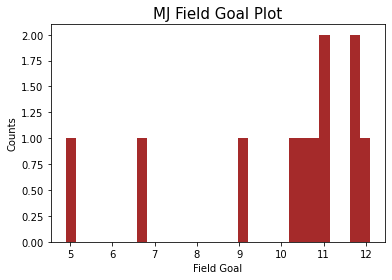

In [188]:
plt.hist(Shaq['FG'], bins = 30, color='brown')
plt.xlabel('Field Goal', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.title('MJ Field Goal Plot',fontsize=15)